# Final Project
## COGS 189, Winter 2021
## Yleia Sanchez

For this project, my goal was to examine how well different classification methods were at classifying brain waves. I wanted to examine different classification methods because I was interested in learning how much classifications methods can vary when being used on the same dataset.

Because this class focuses on brain-computer interfaces (BCI), I aimed at chosing a dataset that would help me understand how we use eeg data in a relatively straightforward way. 
The dataset I chose to uses measured participants brain activities while completing a number of tasks using EEG. On two ends of this spectrum, we have participants doing math versus participants relaxing.

For this project, we are going to focus mainly on the classification of our 'relax' signals by comparing k-nearest neighbors (KNN), decision trees, extra trees, random forests, gadient boost, and support vector classification (SVC) from the sklearn library in order to find the most accurate classification method.

dataset: https://www.kaggle.com/berkeley-biosense/synchronized-brainwave-dataset

all code derived from:
https://www.kaggle.com/elsehow/classifying-relaxation-versus-doing-math
and 
https://www.kaggle.com/seaneuron/math-relax-prediction-with-different-classifiers

## Setup

In [4]:
import json
import pandas as pd

df = pd.read_csv("eeg-data.csv")

df.raw_values = df.raw_values.map(json.loads)
df.eeg_power = df.eeg_power.map(json.loads)

relax = df[df.label == 'relax']
math = df[(df.label == 'math1') |
          (df.label == 'math2') |
          (df.label == 'math3') |
          (df.label == 'math4') |
          (df.label == 'math5') |
          (df.label == 'math6') |
          (df.label == 'math7') |
          (df.label == 'math8') |
          (df.label == 'math9') |
          (df.label == 'math10') |
          (df.label == 'math11') |
          (df.label == 'math12') ]

def vectorLabels(List1, List2):
    x = List1 + List2
    def Label(L):
        return lambda x: L
    y = list(map(Label(0), List1)) + list(map(Label(1), List2))
    return x, y

In [5]:
# organization of the training data
import numpy as np

trainData = pd.DataFrame(columns=["delta", "theta", "low_alpha", "high_alpha", \
                                 "low_beta", "high_beta", "low_gamma", "mid_gamma"])
for id in pd.unique(math["id"]):
    math1 = math[math['id']==id]
    relax1 = relax[relax['id']==id]
    x, y = vectorLabels(math1.eeg_power.tolist(), relax1.eeg_power.tolist())
    x = np.matrix(x)
    y = np.array(y)
    data = pd.DataFrame(data = x,
                        index = y,
                        columns = ["delta", "theta", "low_alpha", "high_alpha", \
                                 "low_beta", "high_beta", "low_gamma", "mid_gamma"])
    frames = [trainData, data]
    trainData = pd.concat(frames)
trainData.describe().T

,count,mean,std,min,25%,50%,75%,max
delta,1870.0,251826.381818,448237.301788,792.0,16553.00,62783.5,263056.25,3240799.0
theta,1870.0,61600.065775,107685.398107,1159.0,13551.50,28350.0,62940.50,1416472.0
low_alpha,1870.0,26878.933155,42728.938431,266.0,5431.00,13161.0,30288.75,586468.0
high_alpha,1870.0,22633.841711,32244.913432,151.0,5665.75,12452.5,26788.25,694417.0
low_beta,1870.0,12294.291444,15694.896534,295.0,4451.00,8020.0,14781.50,315512.0
high_beta,1870.0,11200.815508,12187.141656,205.0,4664.00,7695.5,12873.00,148264.0
low_gamma,1870.0,6681.974866,10671.456080,86.0,2163.50,3839.0,7019.25,151891.0
mid_gamma,1870.0,4806.425134,6479.447878,25.0,1664.00,3013.0,5640.25,94695.0


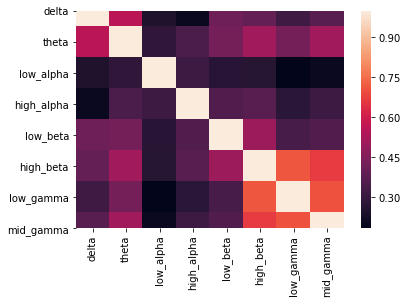

In [6]:
# plot of training data
import seaborn as sns
import matplotlib.pyplot as plt

corr = trainData.corr()
plt.figure()
sns.heatmap(corr)

In [8]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(trainData)
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(data)
plot_data = trainData
plot_data["relax"] = trainData.index
#plt.scatter(pca_data[:, 0], pca_data[:, 1],\
#        c = plot_data["relax"].apply(lambda relax: 'purple' if relax else 'red'))

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

xTrain, xTest, yTrain, yTest = train_test_split(
       trainData, trainData.index, test_size = 0.33, random_state = 42)
xTrain = xTrain.drop("relax", axis = 1)
xTest = xTest.drop("relax", axis = 1)
xTrain.shape

xTrain = xTrain.reset_index(drop = True)
xTest = xTest.reset_index(drop = True)
xTrain = pd.DataFrame(scaler.fit_transform(xTrain))
xTest = pd.DataFrame(scaler.fit_transform(xTest))
xTrain.shape

(1252, 8)

# KNN Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

# Decision Tree & Extra Trees Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth  = None, min_samples_split = 2)

extree = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2)

# Random Forest Classification

In [15]:
forest = RandomForestClassifier(100, max_features=None, min_samples_split=3, min_samples_leaf=3,\
                                random_state=42, n_jobs=-1, oob_score=True)
forest.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
features = pd.DataFrame(forest.feature_importances_,
                        index=trainData.columns[0:8], 
                        columns=['Importance']).sort_values(['Importance'], ascending = False)
features

,Importance
delta,0.135621
high_alpha,0.133487
low_alpha,0.130687
high_beta,0.128326
mid_gamma,0.122169
low_beta,0.120610
theta,0.116269
low_gamma,0.112831


# Gradient Boost

In [17]:
grboost = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1)

# SVC

In [18]:
from sklearn.svm import SVC

svclf = SVC(random_state = 42)

# Comparison Results
These comparisons were made by using the cross validation scores of each classifier.
This was done by using the cross_val_score function from the sklearn library.

In [19]:
clfs = [knn, dectree, extree, grboost, svclf, forest]
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits = 10)
for clf in clfs:
    print(type(clf).__name__, np.mean(cross_val_score(clf, xTrain, yTrain, cv=cv, scoring="roc_auc", n_jobs=-1)))

KNeighborsClassifier 0.605910819255054
DecisionTreeClassifier 0.597363031233999
ExtraTreesClassifier 0.6427667636985808
GradientBoostingClassifier 0.6224560288909181
SVC 0.6208242259404243
RandomForestClassifier 0.6803065655290521


# Ordered Results

### From my notebook: 

1. RandomForestClassifier 0.6803065655290521

2. ExtraTreesClassifier 0.6427667636985808

3. GradientBoostingClassifier 0.6224560288909181

4. SVC 0.6208242259404243

5. KNeighborsClassifier 0.605910819255054

6. DecisionTreeClassifier 0.597363031233999

### From the original notebook:
https://www.kaggle.com/seaneuron/math-relax-prediction-with-different-classifiers

1. RandomForestClassifier 0.661025241407

2. SVC 0.632912741541

3. GradientBoostingClassifier 0.620093471543

4. ExtraTreesClassifier 0.616721153718

5. KNeighborsClassifier 0.610764010965

6. DecisionTreeClassifier 0.578443420379

It should be noted that I used the same input parameters (n_estimators, min_samples_split, etc.) from the original notebook for my classification functions.

Comparing these results with mine, we see that the decision tree classifier ranked the lowest and the random forest classifier ranked the highest in both notebooks. This makes sense that this would be the order of the results as a random forest is a collection of decision trees, and therefore is expected to produce greater accuracy. 
However, the original notebook produces a cross validation scores of ~0.578 for its decision tree classification while I got a score of ~0.591 for my decision tree classification. Meanwhile, the original notebook scored its random forest classifier with a ~0.661 cross validation score while I recieved a ~0.680 for my random forest classifier. Looking at the results, my classifiers seemed to have scored better in general but also contain less variability than the results found in the original notebook.
Also, the SVC and extra tree classifiers seemed to have traded spots for # 2 and 4 in our notebooks. Besides this though, my results seem to be somewhat expected.

Something that surprised me was that the KNN algorithm scored relatively low in both notebooks. I found this interesting because I feel like KNN is the main classification algorithm taught in most machine learning classes, yet it doesn't seem to be very efficient or accurate. I think that this project has really encouraged me to learn more about other classification methods such as decision trees and SVC. 

This project has taught me that working with EEG data can be tricky. You always want to make sure that the dataset you're using a valid dataset published by people familiar with EEG in order to prevent mistakes such as classifying time. Additionally, as you can probably tell, the general cross validation scores produced here are not ideal.
When looking through other notebooks such as https://www.kaggle.com/elsehow/classifying-relaxation-versus-doing-math, the results never seemed to be exemplary. This particular notebook seemed to hugely overfit the data and managed to yield 100% accuracy for some predictions. I find these results hard to believe considering I just tested 6 different classification methods and came nowhere near 100% accuracy. Although, this is just a problem in general. 

Overall, this project has taught me a lot about working with EEG data and the contrast that different classification algorithms can make.

In [20]:
# Just for fun
knn2 = KNeighborsClassifier(n_neighbors=7)
extree2 = ExtraTreesClassifier(n_estimators=7, max_depth=None, min_samples_split=2)
grboost2 = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=1)
clfs2 = [knn2, extree2, grboost2]
cv = StratifiedKFold(n_splits=7)
for clf in clfs2:
    print(type(clf).__name__, np.mean(cross_val_score(clf, xTrain, yTrain, cv=cv, scoring="roc_auc", n_jobs=-1)))

KNeighborsClassifier 0.5943767165485804
ExtraTreesClassifier 0.6337138045518721
GradientBoostingClassifier 0.6006550566473556


I would be interested in knowing why the extra trees classifier works better when n is decreased from 10 to 7.